<font color = blue> ***Name: Yiming Gao*** </font><br />
<font color = blue> ***NetID: yimingg2*** </font>

# Eulerian cycles 

For the Koenigsberg example, the following are three representations of the multi-graph we saw in class.


In [1]:
import numpy as np

Adjacency = np.matrix('0 0 2 1; 0 0 2 1; 2 2 0 1; 1 1 1 0')
Incidence = np.matrix('1 0 1 0; 1 0 1 0; 1 0 0 1; 0 1 1 0; 0 1 1 0;0 1 0 1; 0 0 1 1')
List = [(1,3),(1,3),(1,4),(2,3),(2,3),(2,4),(3,4)]

One simple exercise to get the adjacency matrix from an incidence matrix is matrix multiplication:

$$A = I^TI - D$$

In [2]:
# compute a diagonal matrix of the degrees
D = Adjacency*np.ones((4,1))
print('degrees = \n',D.T)
D, = np.array(D.T)
D = np.diag(D) # list diagonal elements as an array
print('D = \n',D)
Adjacency_new = Incidence.T*Incidence - D
print('Original Adjacency =\n',Adjacency)
print('New Adjacency =\n',Adjacency_new)

degrees = 
 [[ 3.  3.  5.  3.]]
D = 
 [[ 3.  0.  0.  0.]
 [ 0.  3.  0.  0.]
 [ 0.  0.  5.  0.]
 [ 0.  0.  0.  3.]]
Original Adjacency =
 [[0 0 2 1]
 [0 0 2 1]
 [2 2 0 1]
 [1 1 1 0]]
New Adjacency =
 [[ 0.  0.  2.  1.]
 [ 0.  0.  2.  1.]
 [ 2.  2.  0.  1.]
 [ 1.  1.  1.  0.]]


It is often convenient to store and operate on graphs using a library NetworkX 
(tutorials and references on the library can be found at https://networkx.readthedocs.io/en/stable/).

Install NetworkX (https://networkx.readthedocs.io/en/stable/install.html#quick-install).

It comes with a rich set of functions over graphs that will be useful to us throughout this course, for example **determining if the graph is  *connected*, finding the *degree distribution*, finding the *degree* of all nodes, or even determining if the graph has an *Eulerian cycle* or not** (which was the initial interest in the Koenigsberg bridge problem). 

In [3]:
import networkx as nx

G = nx.MultiGraph()
G.add_edges_from(List)
print('is G connected?',nx.is_connected(G))
print('sorted list of degrees',sorted(nx.degree(G).values()))
print('degree of nodes',nx.degree(G))
print('is G Eulerian?',nx.is_eulerian(G))

is G connected? True
sorted list of degrees [3, 3, 3, 5]
degree of nodes {1: 3, 3: 5, 4: 3, 2: 3}
is G Eulerian? False


we can plot graphs using the following functions. Note that there are multiple ways to draw the same graph (depending on which layout one prefers and also depending on what random seed was used). 

In [4]:
import warnings
warnings.filterwarnings('ignore')

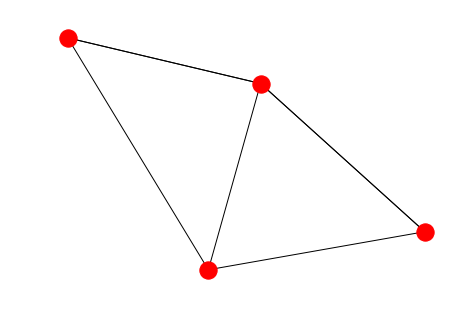

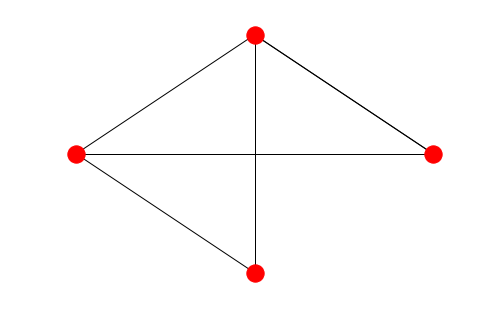

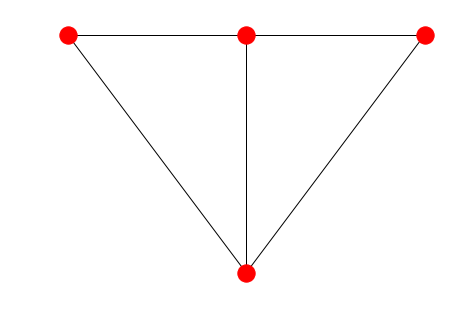

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 

nx.draw(G)
plt.show()
nx.draw_circular(G)
plt.show()
nx.draw_spectral(G)
plt.show()

### Q1. for the DNA sequencing exaxmple, write your own code for generating the directed graph we learned in class, so that you can find a DNA sequences using Eulerian cycle algorithm

In the example from the class, we have the following sub-sequences sampled from a single sequence of nucleotides.

In [6]:
subsequence = ['ATG', 'TGG', 'TGC', 'GTG', 'GGC', 'GCA', 'GCG', 'CGT']

Write a code below that generates and plots the graph $G$ defined from the subsequences above. Namely, for a length $k$ subsequnce (in which case we have $k=3$ in the above example), take the first $k-1$ nucleotides and assign a node to each **unique** length-$(k-1)$ subsequence. Also take the last $k-1$ nucleotides and assign a node to each **unique** length-$(k-1)$ subsequence. Add a directed edge for each subsequence in the samples, i.e. for the subsequence 'ATG', add an edge from node 'AT' to 'TG'.

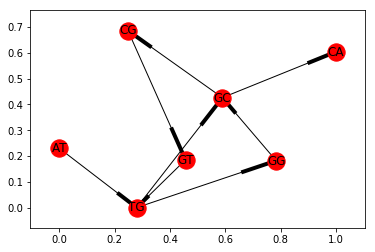

In [7]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
k = 3
def subsequences_to_graph(subsequences):
    import networkx as nx
    G = nx.DiGraph()
    
# ------ YOUR CODE HERE that generates the graph ------------
    
    for i in subsequence:
        G.add_edges_from([(i[: k-1], i[1: ])])

# ------------------------------------------------------------
    return G

G = subsequences_to_graph(subsequence) 
nx.draw_networkx(G,arrows=True,with_labels=True)
plt.show()

Write a code that finds one of many possible **Eulerian paths** in the given graph.

Note that in order to use the built in nx.eulerian_circuit(G,start_node) function, you need to first identify the start and end of the sequence and add a pseudo directed edge from the node in the end-of-sequence to the start-of-sequence.

Output one complete sequence that is consistent with the samples we have seen in the list subsequences.

In [8]:
# ------ YOUR CODE HERE that finds a DNA sequence

G = subsequences_to_graph(subsequence) 

# start and end nodes of sequence
start_node = next(key for key, value in G.in_degree().items() if value == 0)
end_node = next(key for key, value in G.out_degree().items() if value == 0)

# add pseudo directed edge 
G.add_edge(end_node, start_node)

# Find one Eulerian path
list(nx.eulerian_circuit(G, source = start_node))

[('AT', 'TG'),
 ('TG', 'GG'),
 ('GG', 'GC'),
 ('GC', 'CG'),
 ('CG', 'GT'),
 ('GT', 'TG'),
 ('TG', 'GC'),
 ('GC', 'CA'),
 ('CA', 'AT')]

Note that the last edge 'CA' to 'AT' is an artificial edge added by us to force the graph to have a Eulerian cycle (and removing it finds the Eulerian Path)

### Q2. we will explore in ths example how the length of the sub-sequence $k$ and the length of the whole DNA sequence $n$ determine the existence of a **unique** Eulerian path

We can get an approximate estimate of the probability of success, where success means success in identifying the true sequence which happens if there is a **unique** Eulerian path in the induced graph $G$. 
Consider two random sub-sequences of length $(k-1)$ denoted by $x_1$ and $x_2$. The probability they are exactly the same is 

$$P(x_1=x_2) = (1/4)^{(k-1)}$$

There are $(n-k+2)$ sub-sequences of length $(k-1)$ in a DNA sequence of length $n$. 
We are interested in the probability that all of those sub-sequences are **distinct** (different from each other), which implies that the proposed sequencing algorithm based on Eulerian path is successful. Hence, 

$$P(\text{Eulerian path sequencing algorithm is successful}) = P(\text{all sub-sequences are distinct})$$

Estimating this probability is not easy as 
the sub-sequences are not independent (in particular a two immediate neighbors share $k-2$ nucleotides). 
One way to approximate this probability is by assuming independence. 
Suppose (non-rigorously) for now that the event of a pair being different is **independent** of the event that two other pairs are different. Then, the above probability can be immediately computed as 

\begin{eqnarray}
 P(\text{all sub-sequences are distinct}) &\simeq& 
 P(x_1\neq x_2)^{(n-k+2)(n-k+1)/2} \\
 &=& (1-(1/4)^{(k-1)})^{(n-k+2)(n-k+1)/2}
\end{eqnarray}

where $(n-k+2)(n-k+1)/2$ is the total number of pairs of sub-sequences we have to compare. 
For one example of $n=50$ length sequence for $k\in\{4,5,6,7,8,9,10\}$, this probability of success is shown below.

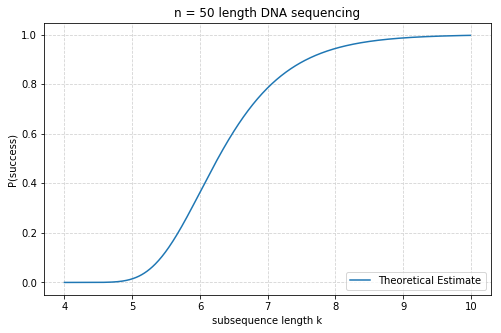

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# ---------- WRITE YOUR CODE for drawing this figure

# Calculations
n = 50
K = np.arange(4, 10, 0.01)
P = (1- (1 / 4)**(K-1))**((n-K+2)*(n-K+1)/2)

# Display the graph
plt.figure(figsize = (8, 5))
plt.plot(K, P, label = "Theoretical Estimate")
plt.xlabel('subsequence length k')
plt.ylabel('P(success)')
plt.title('n = 50 length DNA sequencing')
plt.legend(loc = "lower right")
plt.grid(color = 'lightgray', linestyle = '--')
plt.show()

# --------------------------------------------------

It is expected that the probability is monotonic in $k$ as larger $k$ implies that two sub-sequences are unlikely to be the same. 

Another way of getting an approximation of the success probability is using **union bound**. 

\begin{eqnarray}
 P(\text{success}) &=&
 1-P(\text{there exist two sequences that are the same}) \\
 &\geq& 
 1- \frac{(n-k+2)(n-k+1)}{2} \times P(x_1= x_2) \\
 &=& 1- \frac{(n-k+2)(n-k+1)}{2} (1/4)^{(k-1)}
\end{eqnarray}

Two approximations together is shown below:

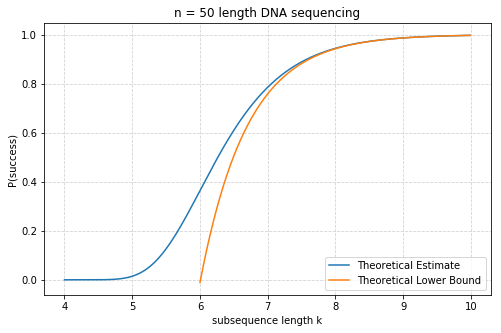

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# ---------- WRITE YOUR CODE for drawing this figure

# Calculations
n = 50
K1 = np.arange(4, 10, 0.01)
K2 = np.arange(6, 10, 0.01)
P1 = (1- (1 / 4)**(K1-1))**((n-K1+2)*(n-K1+1)/2)
P2 = 1 - ((n-K2+2) * (n-K2+1) / 2) * (1/4) ** (K2 - 1)

# Display the graph
fig, ax = plt.subplots(figsize = (8, 5))

plt.plot(K1, P1, label = "Theoretical Estimate")
plt.plot(K2, P2, label = "Theoretical Lower Bound")

plt.xlabel('subsequence length k')
plt.ylabel('P(success)')
plt.title('n = 50 length DNA sequencing')
plt.legend(loc = "lower right")
plt.grid(color = 'lightgray', linestyle = '--')
plt.show()

# --------------------------------------------------

We are now going to simulate DNA sequencing as follows. First for a given length of DNA, say $n=50$, generate a random sequence of $\{A,C,G,T\}$ of length $n$ where each nucleotide is chosen independently and with probability 1/4. Once a DNA sequence is generated, sample $n-k+1$ sub-sequences by taking length-$k$  subsequences of the DNA from position $i$ to position $i+k-1$ for $i\in\{0,1,\ldots,n-k\}$. Store these subsequnces in a list and call the function *subsequences_to_graph()* you wrote a bove to get a graph $G$.

Check if there is a unique Eulerian path in this graph by counting the maximum indegree of a node in this directed graph. Increase the number of errors by one if this DNA sequence has multiple Eulerian cycles. 

Repeat this for $N$ independent sample DNA sequences, for given $n$ and $k$, and return the average probability of success.


In [11]:
def simulate(N,n,K):
# ------------- YOUR CODE HERE 

    succ = [] # empty list
    
    for i in range(N):
        
        sequence = ''.join(list(np.random.choice(["A", "C", "G", "T"], n, p = [0.25, 0.25, 0.25, 0.25])))
        sub_list = []

        for j in range(n - K + 1):
            sub_list.append(sequence[j: j + K])
        
        # create a graph
        G = nx.DiGraph()
    
        for j in sub_list:
            G.add_edges_from([(j[: K-1], j[1: ])])
        
        # check if there exists unique Euler path
        max_in_degree = max(G.in_degree().values())
        succ.append(list(G.in_degree().values()).count(max_in_degree) == len(G.in_degree().values()) - 1)
   
    # take average
    return (np.mean(succ))

# ----------------------------------------------------

simulate(1000,50,7)

0.82799999999999996

Using the function *simulate()*, find the probability of success for $N=200$, $n=50$, and $k\in\{4,5,6,7,8,9,10\}$, and plot the result with theoretical estimates.

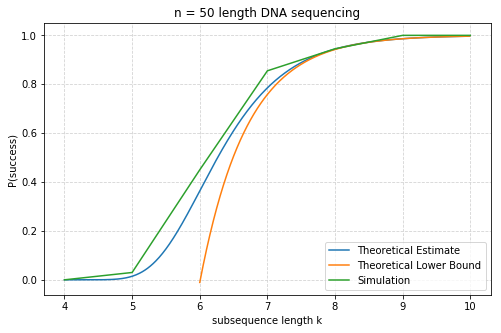

In [12]:
N = 200 # sample size
n = 50 # DNA length
P_succ=[]

for k in range(4,11): # sub-sequence length
  P_succ.append(simulate(N,n,k))

# ------------- YOUR CODE HERE 

K1 = np.arange(4, 10, 0.01)
K2 = np.arange(6, 10, 0.01)
K3 = range(4, 11)

P1 = (1- (1 / 4)**(K1-1))**((n-K1+2)*(n-K1+1)/2)
P2 = 1 - ((n-K2+2) * (n-K2+1) / 2) * (1/4) ** (K2 - 1)

# Display the graph
fig, ax = plt.subplots(figsize = (8, 5))

plt.plot(K1, P1, label = "Theoretical Estimate")
plt.plot(K2, P2, label = "Theoretical Lower Bound")
plt.plot(K3, P_succ, label = "Simulation")

plt.xlabel('subsequence length k')
plt.ylabel('P(success)')
plt.title('n = 50 length DNA sequencing')
plt.legend(loc = "lower right")
plt.grid(color = 'lightgray', linestyle = '--')
plt.show()

# ---------------------------------------